In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('../Data/amazon_filtered_0513.csv', index_col=0)
df.head(2)

,name,price_current,price_original,reviews_number,seller,score,brand,height_cm,width_cm,screen_size_in,...,proc_speed_ghz,ram,ram_type,ram_max,memory,os,battery_wh,battery_cells,weight_kg,since
0,"Huawei MateBook D 15"" - AMD Ryzen, Windows 10-...",14999.0,14999.0,156,huawei,4.7,huawei,0.17,35.80,15,...,2.2,8,DDR4,8,256,Windows,42,2,2.3,2020-02-20
1,"Asus Laptop VivoBook 15.6"", Core i7, 8GB RAM,...",17999.0,19999.0,28,asus,4.0,asus,0.22,25.45,16,...,1.8,8,DDR4,12,8,Windows,42,1,2.5,2020-03-10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            479 non-null    object 
 1   price_current   479 non-null    float64
 2   price_original  479 non-null    float64
 3   reviews_number  479 non-null    int64  
 4   seller          479 non-null    object 
 5   score           479 non-null    float64
 6   brand           479 non-null    object 
 7   height_cm       479 non-null    float64
 8   width_cm        479 non-null    float64
 9   screen_size_in  479 non-null    int64  
 10  proc_brand      479 non-null    object 
 11  proc_speed_ghz  479 non-null    float64
 12  ram             479 non-null    int64  
 13  ram_type        479 non-null    object 
 14  ram_max         479 non-null    int64  
 15  memory          479 non-null    int64  
 16  os              479 non-null    object 
 17  battery_wh      479 non-null    int

In [4]:
columns_not_numeric = df.select_dtypes(exclude='number').columns
df.drop(columns=columns_not_numeric, inplace=True)
df.head(2)

,price_current,price_original,reviews_number,score,height_cm,width_cm,screen_size_in,proc_speed_ghz,ram,ram_max,memory,battery_wh,battery_cells,weight_kg
0,14999.0,14999.0,156,4.7,0.17,35.80,15,2.2,8,8,256,42,2,2.3
1,17999.0,19999.0,28,4.0,0.22,25.45,16,1.8,8,12,8,42,1,2.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price_current   479 non-null    float64
 1   price_original  479 non-null    float64
 2   reviews_number  479 non-null    int64  
 3   score           479 non-null    float64
 4   height_cm       479 non-null    float64
 5   width_cm        479 non-null    float64
 6   screen_size_in  479 non-null    int64  
 7   proc_speed_ghz  479 non-null    float64
 8   ram             479 non-null    int64  
 9   ram_max         479 non-null    int64  
 10  memory          479 non-null    int64  
 11  battery_wh      479 non-null    int64  
 12  battery_cells   479 non-null    int64  
 13  weight_kg       479 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 56.1 KB


In [6]:
def print_title(text):
    borde = '_' * (len(text) + 4)
    borde_titulo = '| ' + text.upper() + ' |'
    print()
    print(borde.center(50))
    print(borde_titulo.center(50))
    print(borde.center(50))

In [7]:
def _distribution_plots(plots_quantity, plot_cols=2):
    plot_rows = int( np.ceil( plots_quantity / plot_cols ) )
    plot_size_y = plot_rows * 5
    plot_size_x = plot_cols * 10

    fig, axs = plt.subplots( plot_rows, plot_cols, figsize=(plot_size_x, plot_size_y) )

    return axs, plot_rows


In [8]:
def print_plot_kde(dataframe, name_plot='', plot_cols=2):
    plots_quantity = len( dataframe.columns )
    axs, plot_rows = _distribution_plots(plots_quantity, plot_cols)

    for nrow in range(plot_rows):
        for ncol in range(plot_cols):
            if plots_quantity >= 1:

                plots_quantity -= 1
                dataframe.iloc[:, plots_quantity].plot(kind='kde', ax=axs[nrow][ncol], title=df.columns[plots_quantity - 1])
                
            else:
                break
            
    print_title(name_plot)
    # plt.savefig(name_plot, bbox_inches='tight')

In [9]:
transforms = [
        {
            'name' : 'normal', 
            'data' : preprocessing.Normalizer().fit_transform(df)
        },
        {
            'name' : 'standard', 
            'data' : preprocessing.MinMaxScaler().fit_transform(df)
        },
        {
            'name' : 'max min',
            'data' : preprocessing.StandardScaler().fit_transform(df)
        },
        {
            'name' : 'robust',
            'data' : preprocessing.RobustScaler().fit_transform(df)
        }
    ]



                   ____________                   
                   | ORIGINAL |                   
                   ____________                   

                    __________                    
                    | NORMAL |                    
                    __________                    

                   ____________                   
                   | STANDARD |                   
                   ____________                   

                   ___________                    
                   | MAX MIN |                    
                   ___________                    

                    __________                    
                    | ROBUST |                    
                    __________                    


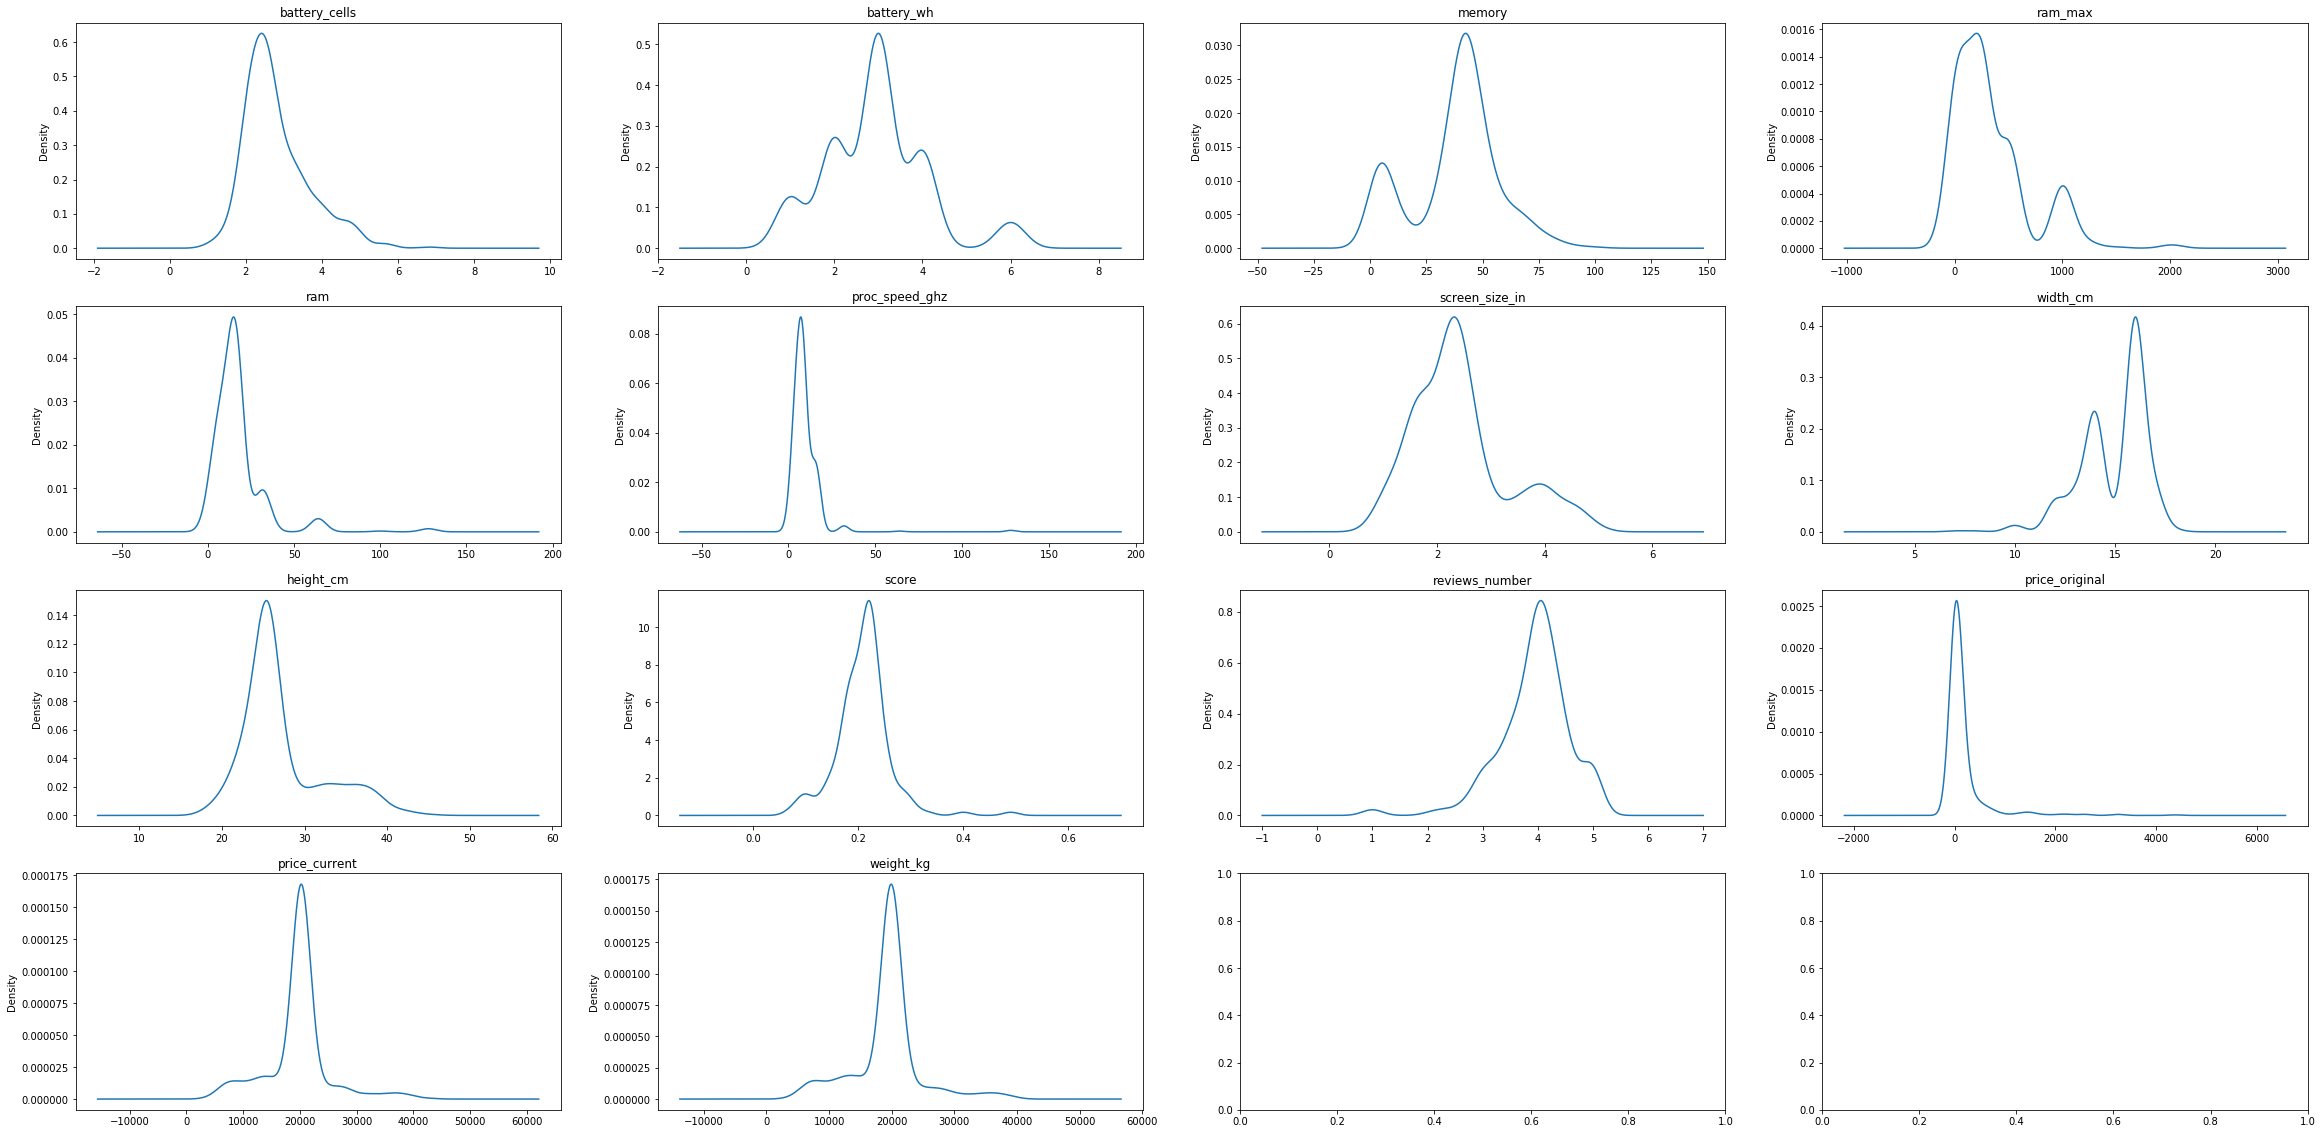

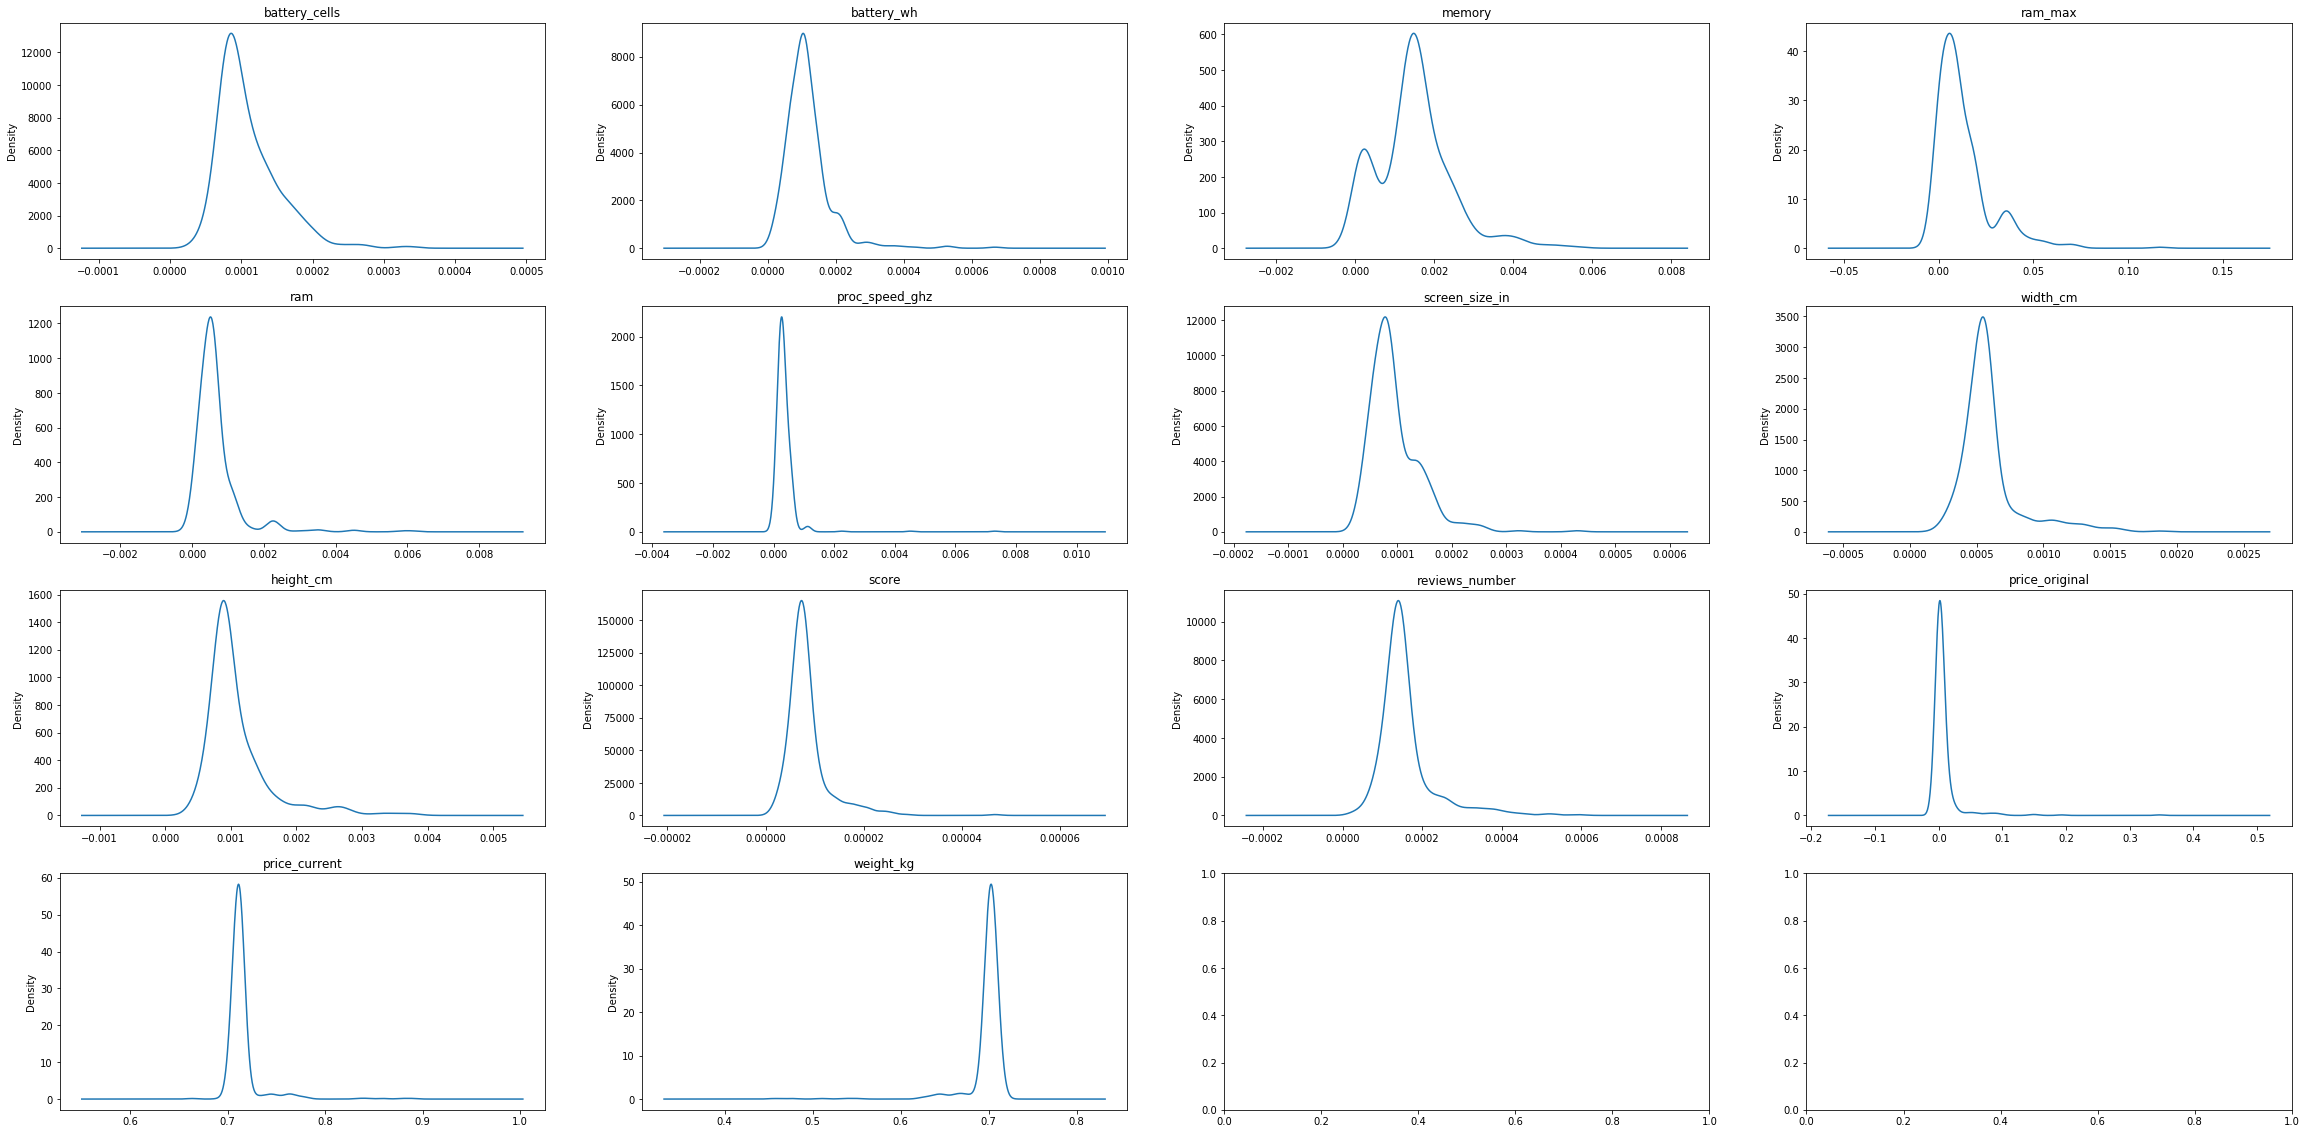

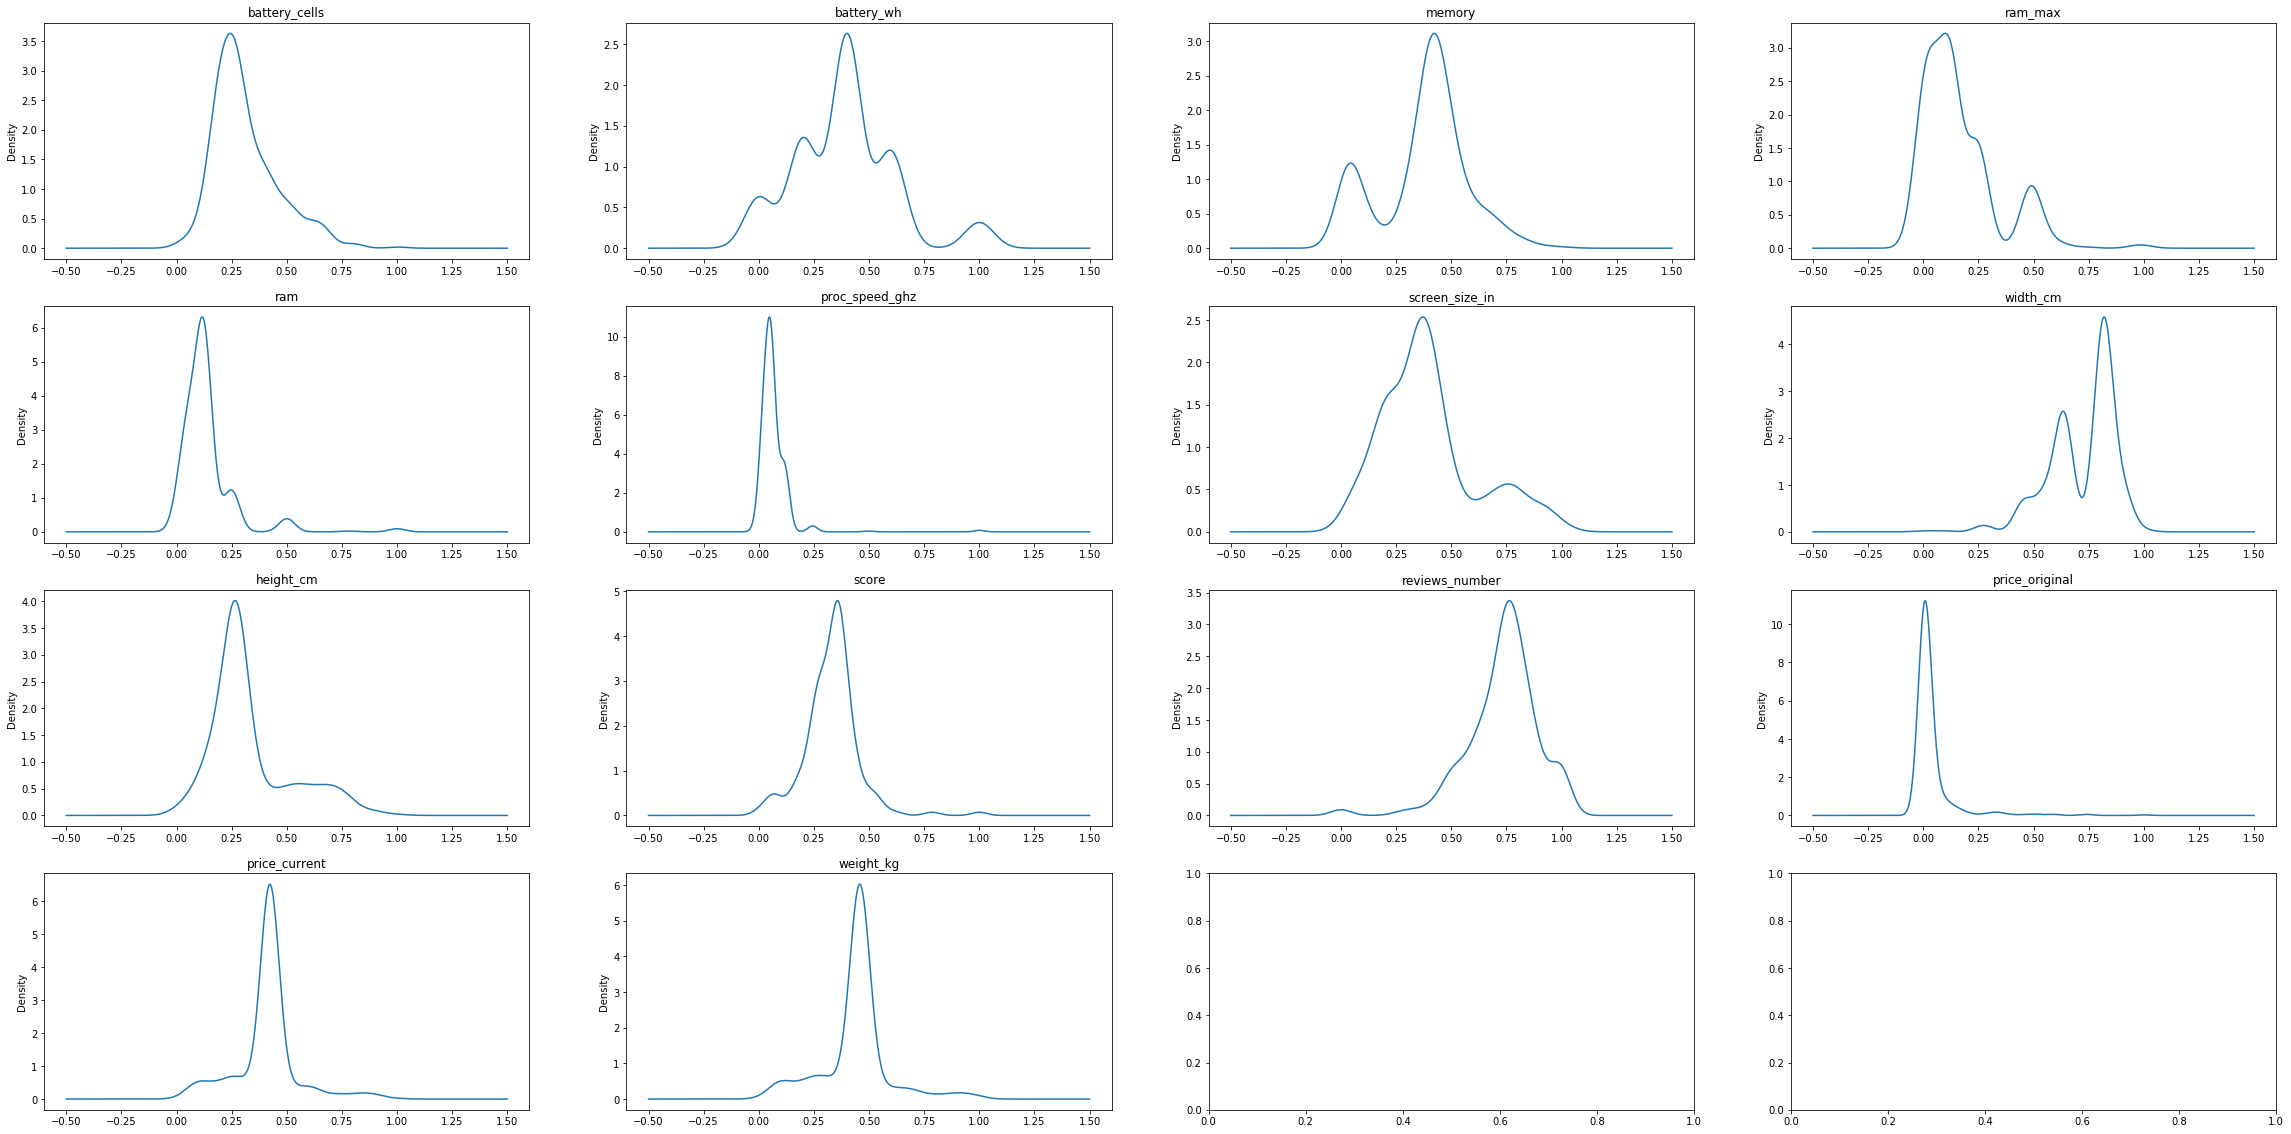

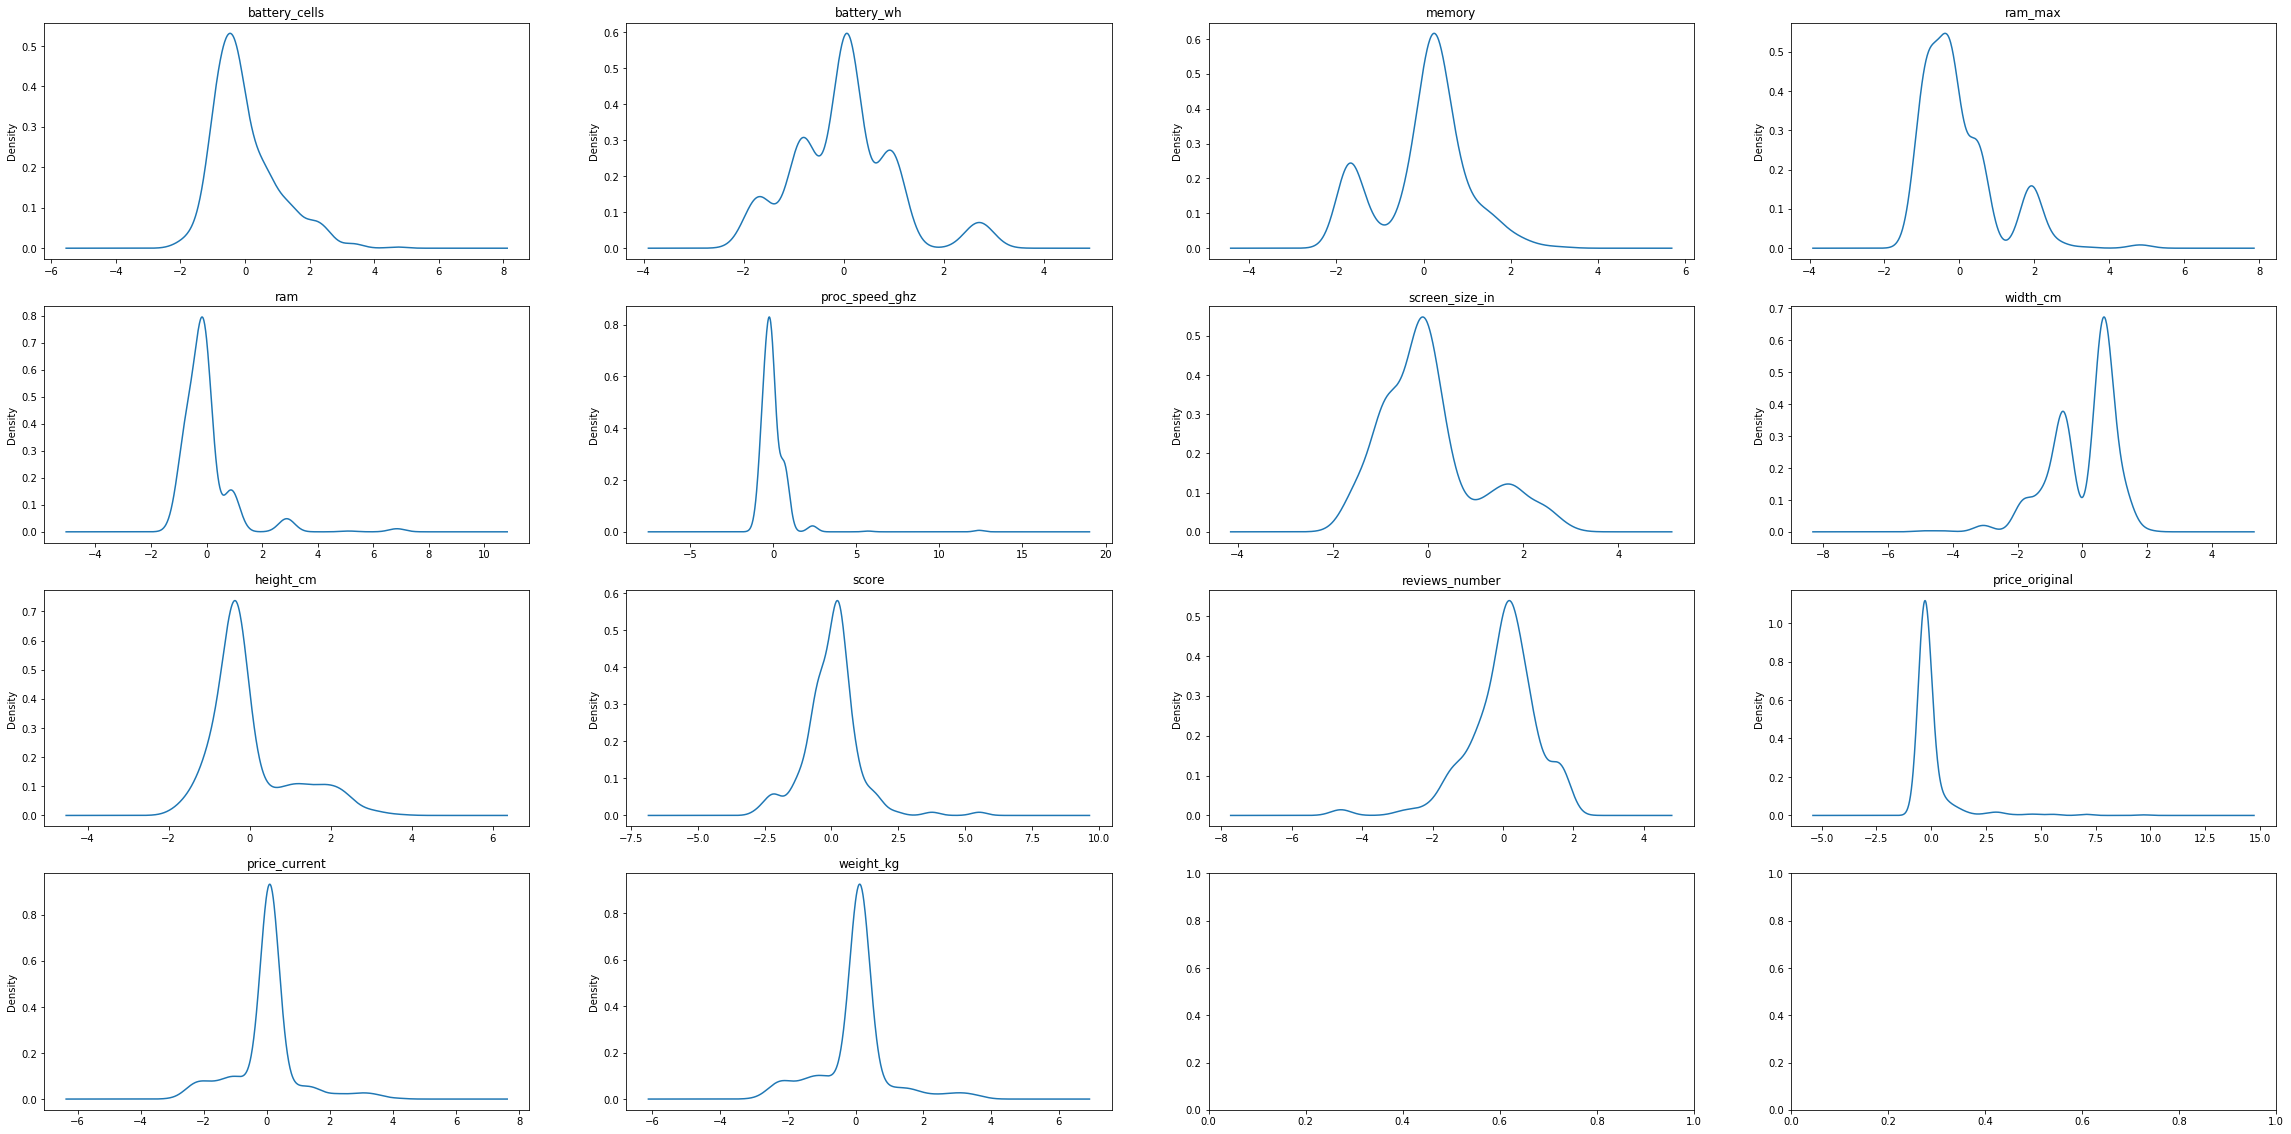

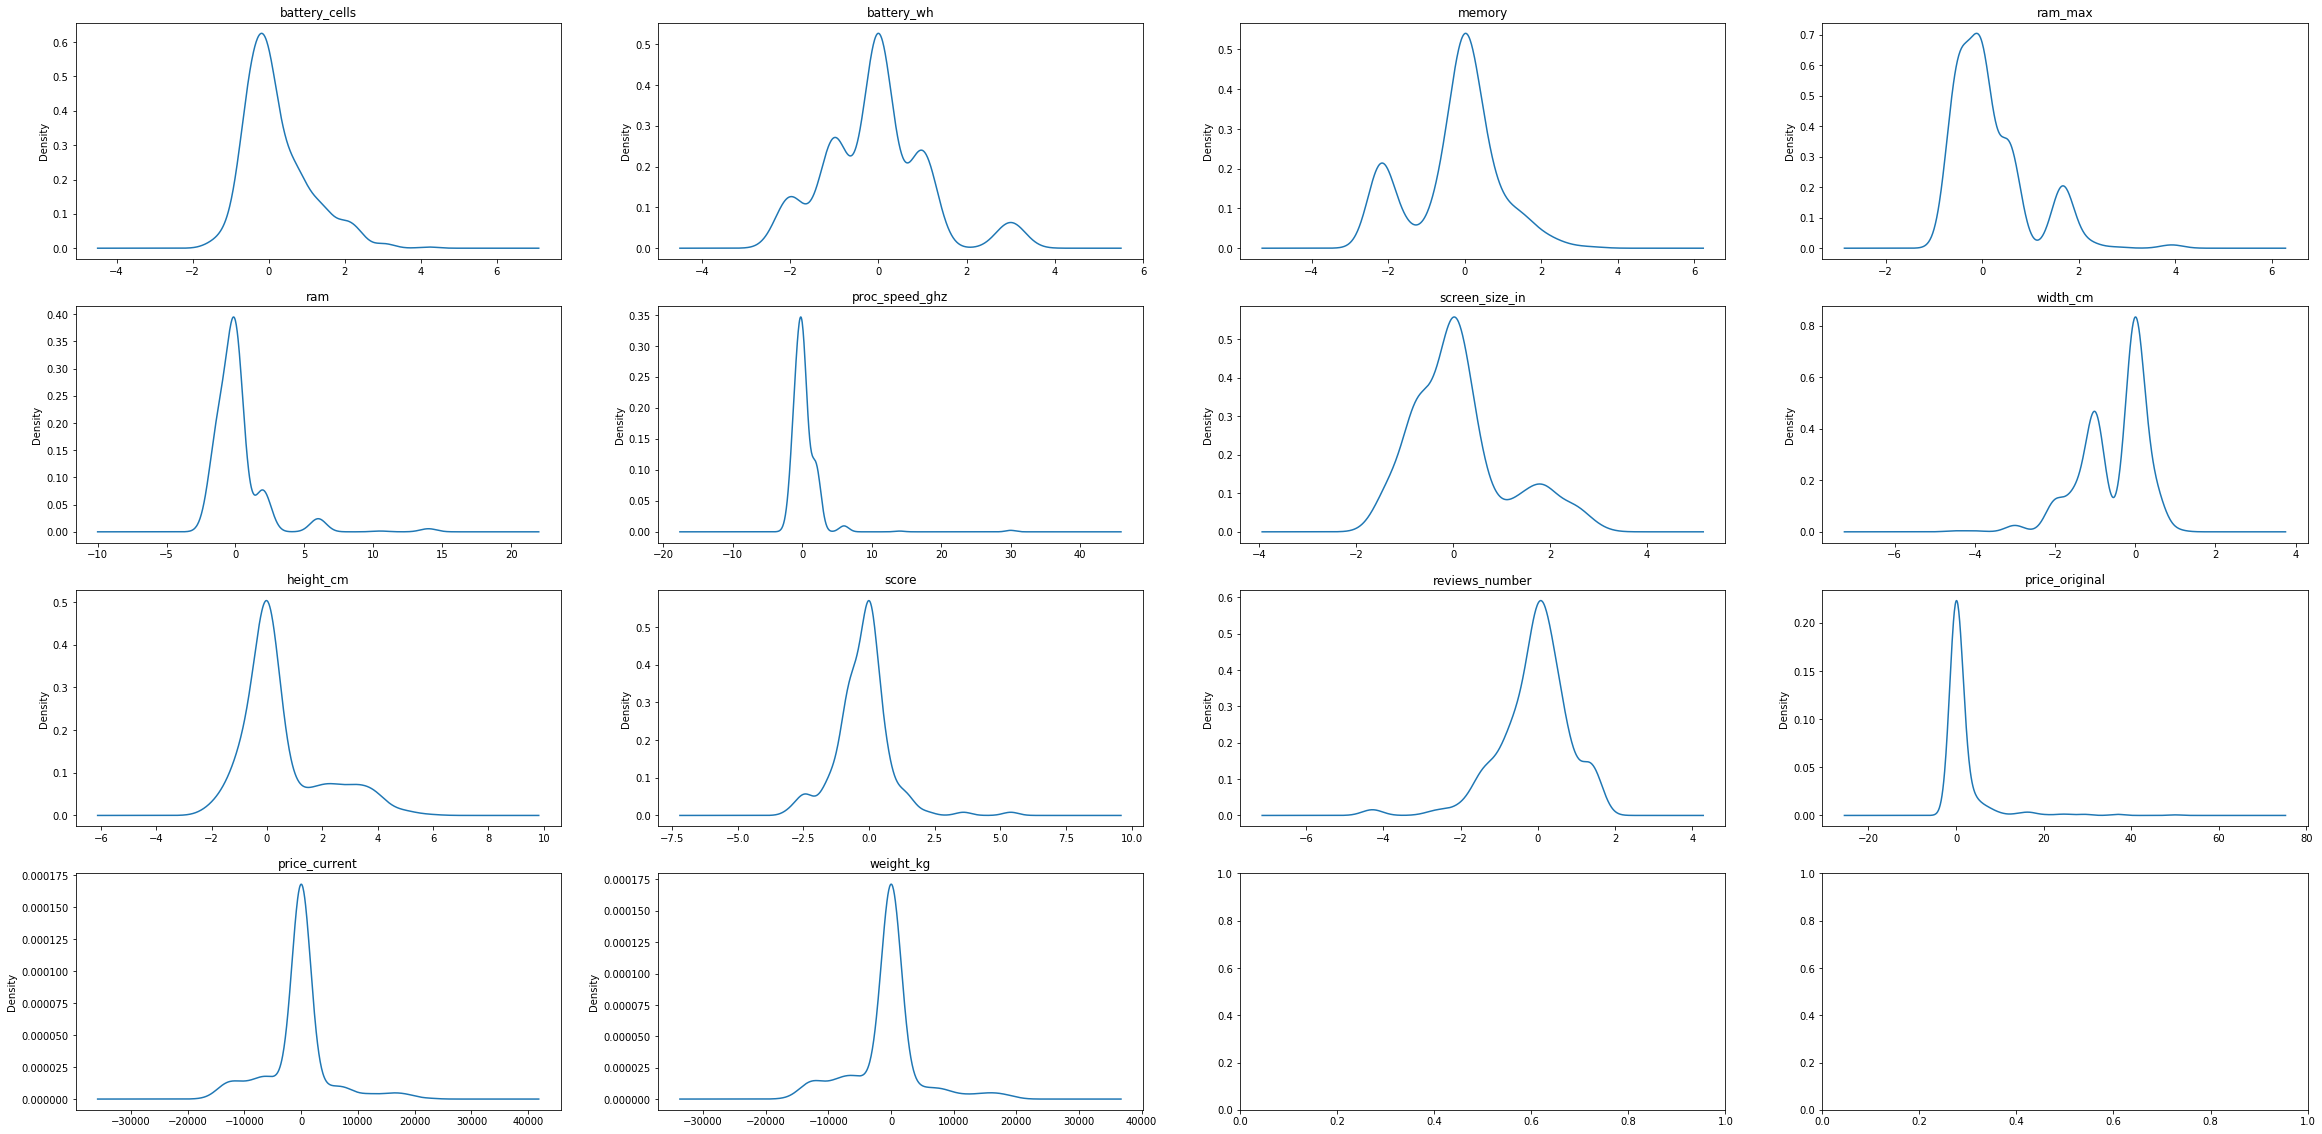

In [10]:
print_plot_kde(df, 'original', 4)

for transform in transforms:
    print_plot_kde( pd.DataFrame(transform['data']), transform['name'], 4 )


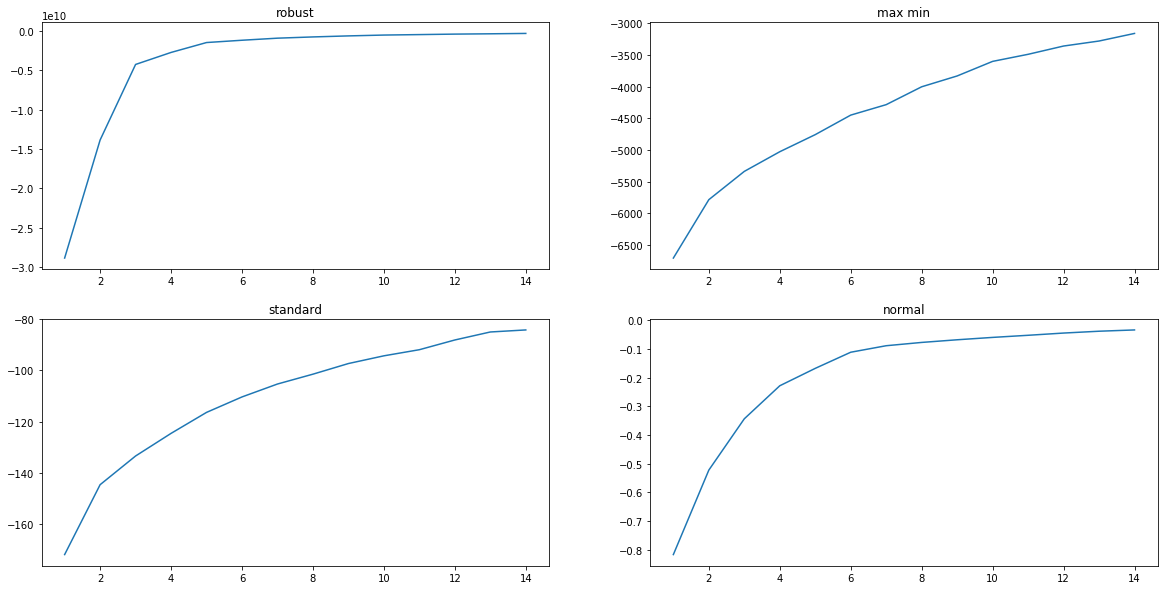

In [11]:
clusters = range(1, 15)

plots_quantity = len( transforms )
plot_cols = 2
ax, plot_rows = _distribution_plots(plots_quantity, plot_cols)

for nrow in range(plot_rows):
    for ncol in range(plot_cols):
        if plots_quantity >= 1:
            plots_quantity -= 1

            kmeans = [ KMeans(n_clusters=i) for i in clusters ]
            score = [ kmeans[i].fit(transforms[plots_quantity]['data']).score(transforms[plots_quantity]['data']) for i in range( len(kmeans) ) ]

            ax[nrow][ncol].plot(clusters,score)
            ax[nrow][ncol].set_title(transforms[plots_quantity]['name'])

        else:
            break

In [12]:
def plot_centroids(df_clusters, title=''):
    categories = df_clusters.columns

    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                        subplot_kw=dict(polar=True), dpi=128)

    plt.xticks(angles[:-1], categories, color='grey', size=12)

    for cluster in df_clusters.index:
        values = df_clusters.iloc[cluster].values.tolist()
        values += values[:1] # repeat the first value to close the circular graph
        ax.plot(angles, values, linewidth=1, linestyle='solid', label='cluster_'+str(cluster))

    plt.legend()
    plt.savefig(title, bbox_inches='tight')
    plt.show()



In [13]:
def kmeans_perform(data, n_clusters, columns='', title=''):
    kmeans = KMeans(n_clusters=n_clusters).fit(data)
    df_clusters = pd.DataFrame(kmeans.cluster_centers_, columns = columns)

    plot_centroids(df_clusters, title)

    print_title(title)
    return kmeans


In [14]:
transforms[0]['cluster'] = 6
transforms[1]['cluster'] = 8
transforms[2]['cluster'] = 8
transforms[3]['cluster'] = 3

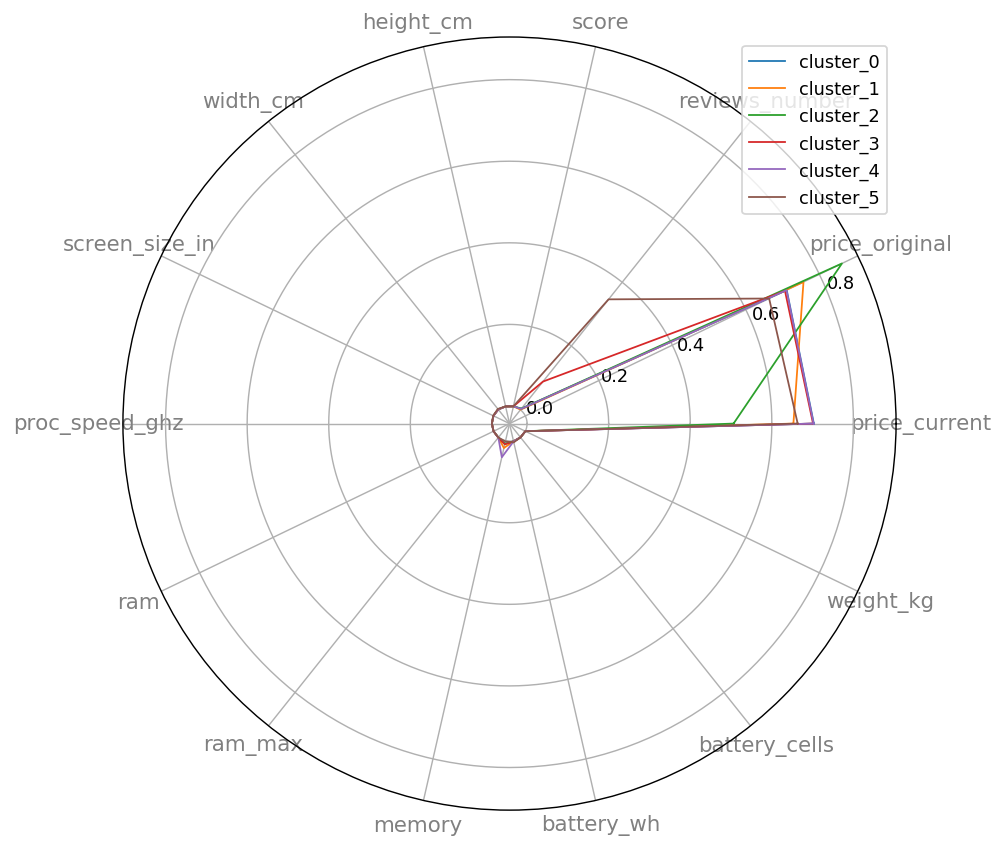


                    __________                    
                    | NORMAL |                    
                    __________                    


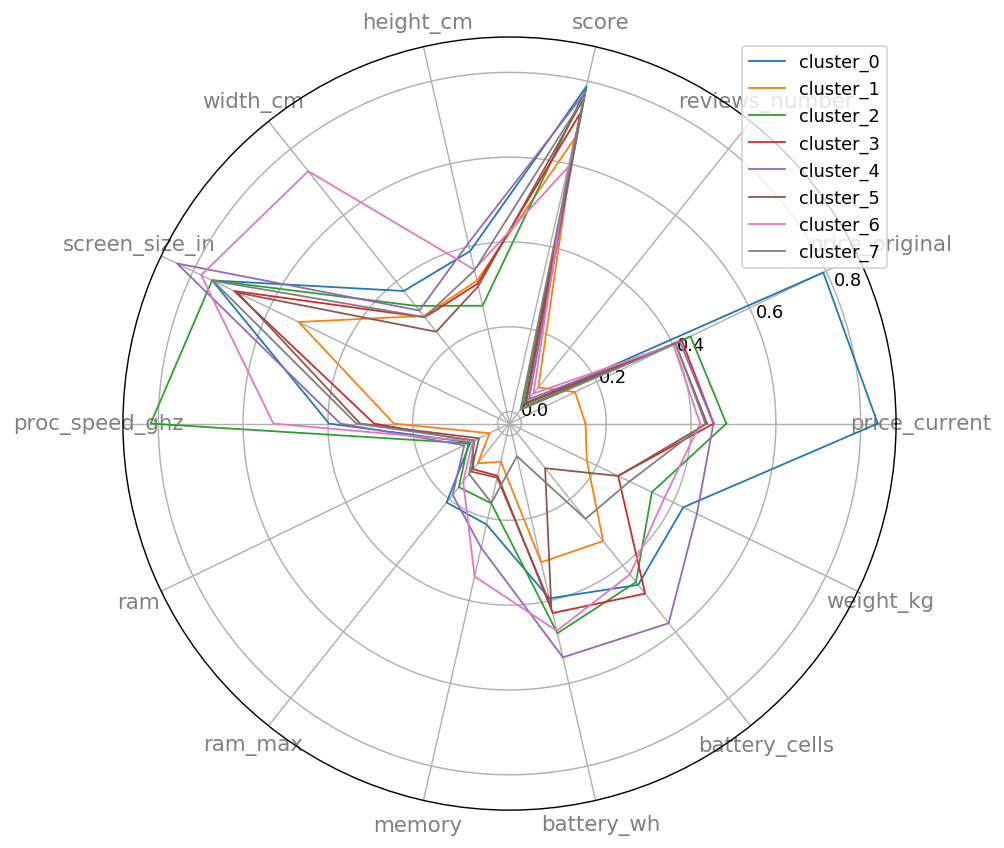


                   ____________                   
                   | STANDARD |                   
                   ____________                   


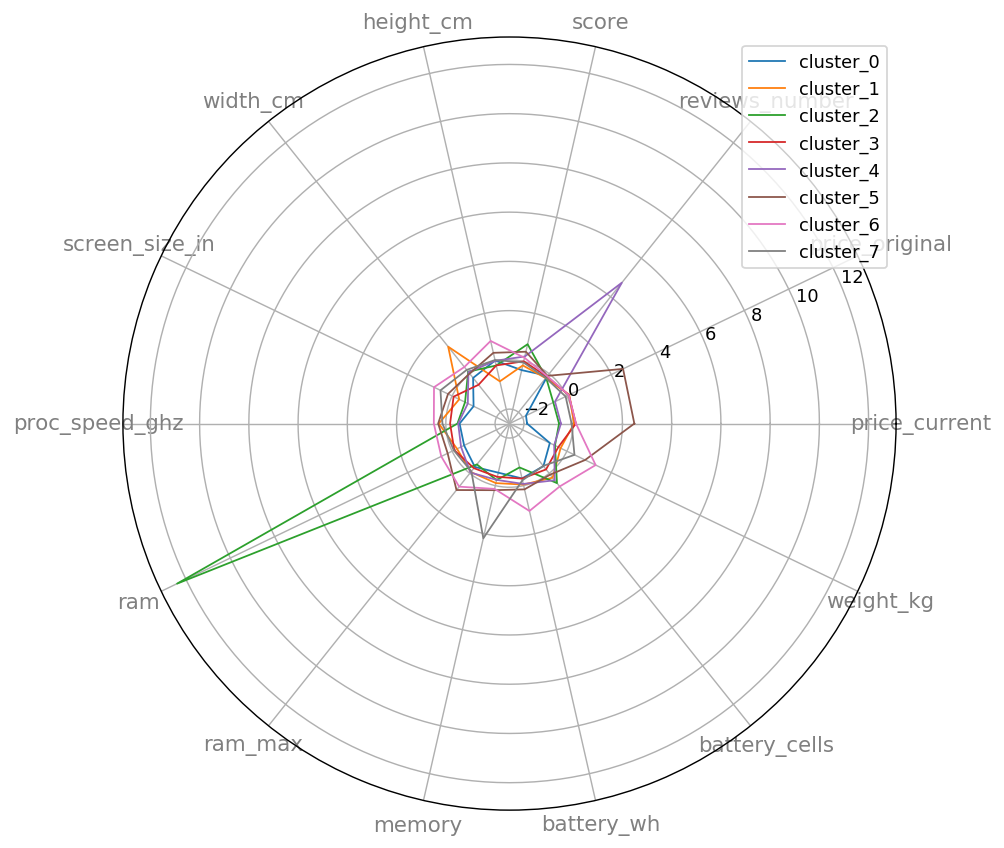


                   ___________                    
                   | MAX MIN |                    
                   ___________                    


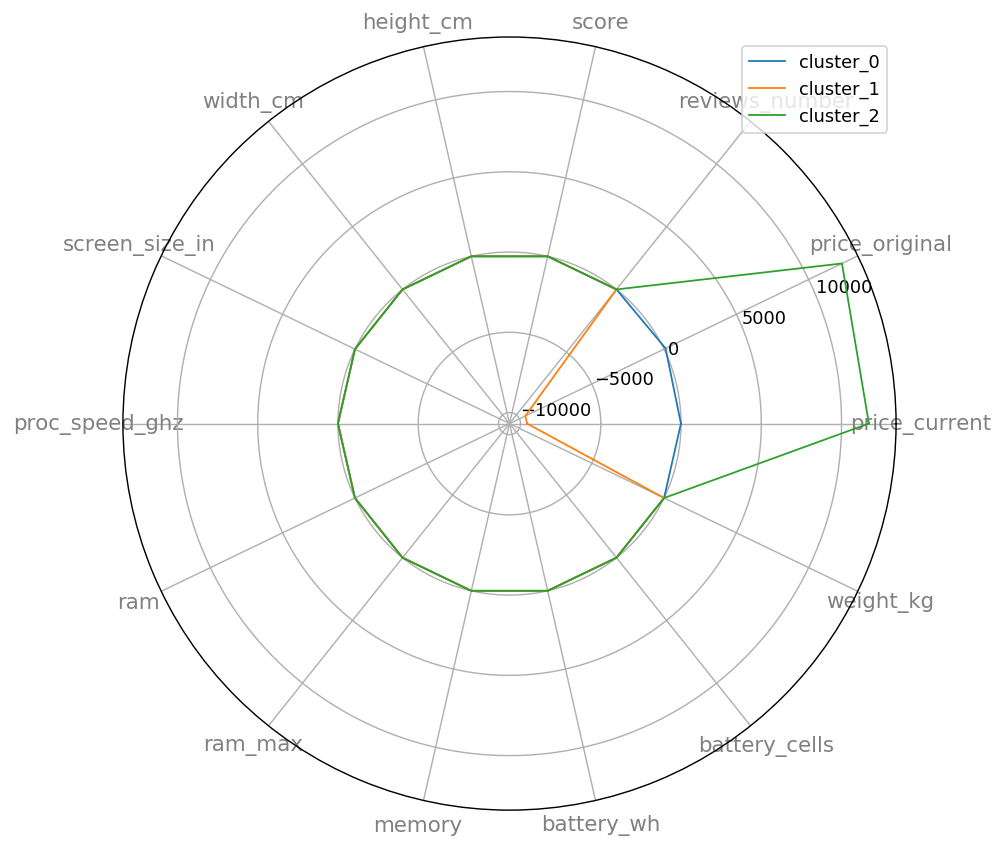


                    __________                    
                    | ROBUST |                    
                    __________                    


In [15]:
for transform in transforms:
    kmeans_perform( transform['data'], 
        transform['cluster'], 
        df.columns, 
        transform['name'] )